In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Fetch data from API (OpenDOSM)
url = "https://api.data.gov.my/data-catalogue?id=hh_income_district&limit=200"
response = requests.get(url)
data = response.json()

# Convert API response to DataFrame
df = pd.DataFrame(data)

# Clean column names for consistency
df.columns = [c.lower() for c in df.columns]

# Data Pre-processing: Ensure income columns are numeric for calculation
df['income_mean'] = pd.to_numeric(df['income_mean'], errors='coerce')
df['income_median'] = pd.to_numeric(df['income_median'], errors='coerce')

print("Data successfully loaded!")
print(f"Dataset Size: {df.shape[0]} observations, {df.shape[1]} variables.")

Data successfully loaded!
Dataset Size: 200 observations, 5 variables.


2. Dataset Characteristics

In [3]:
# 2. Dataset Characteristics Calculations
mean_val = df['income_mean'].mean()
median_val = df['income_mean'].median()
mode_val = df['income_mean'].mode()[0]
std_dev = df['income_mean'].std()

print(f"Mean Income: RM {mean_val:,.2f}")
print(f"Median Income: RM {median_val:,.2f}")
print(f"Mode Income: RM {mode_val:,.2f}")
print(f"Standard Deviation: RM {std_dev:,.2f}")

Mean Income: RM 5,595.47
Median Income: RM 5,243.50
Mode Income: RM 4,959.00
Standard Deviation: RM 1,283.37


3. Relationship Investigation Visualizations

Figure 4.1: Median Household Income by State

/tmp/ipython-input-816748279.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='income_median', y='state', estimator='median', errorbar=None, palette='viridis')


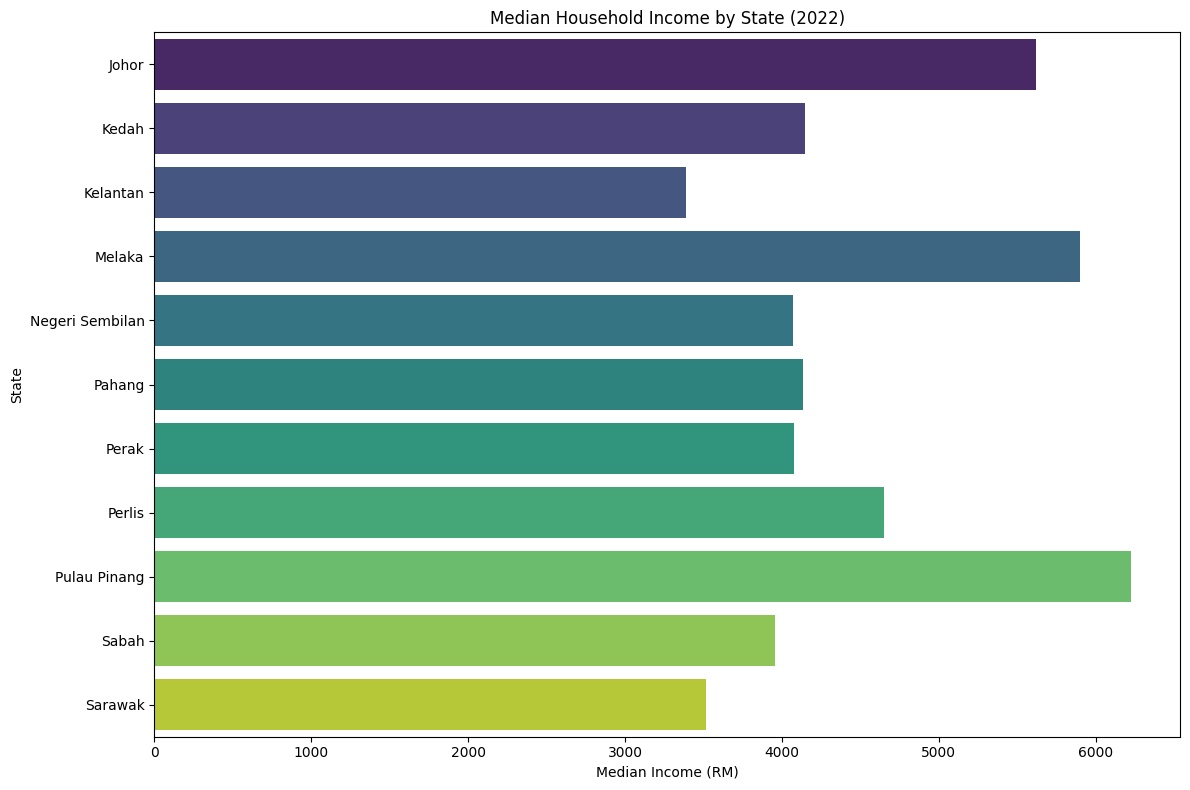

In [4]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='income_median', y='state', estimator='median', errorbar=None, palette='viridis')
plt.title('Median Household Income by State (2022)')
plt.xlabel('Median Income (RM)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

Figure 4.2: Mean vs Median Income Scatter Plot

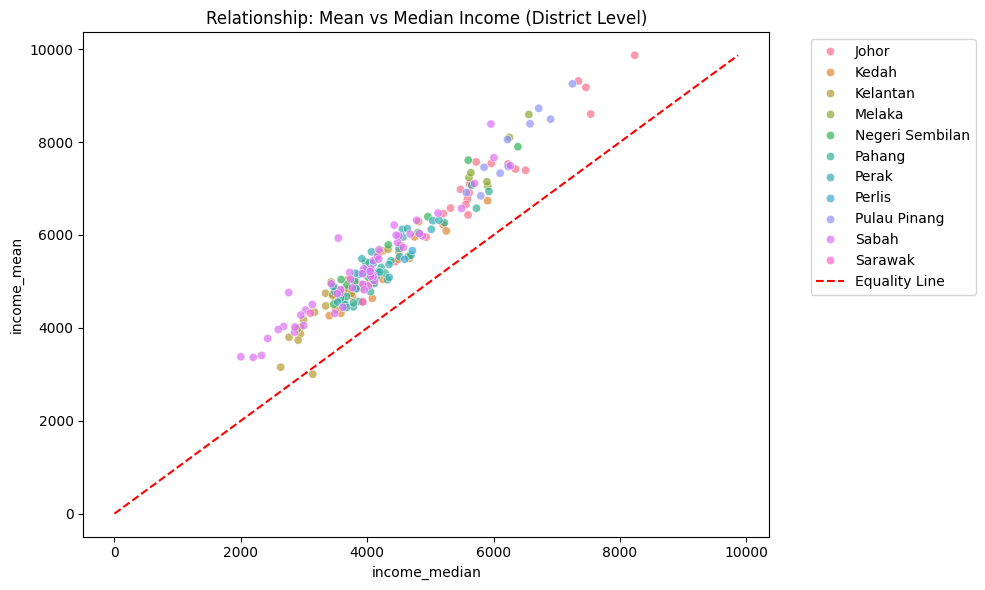

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income_median', y='income_mean', hue='state', alpha=0.7)
plt.plot([0, df['income_mean'].max()], [0, df['income_mean'].max()], 'r--', label='Equality Line')
plt.title('Relationship: Mean vs Median Income (District Level)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Figure 4.3: Income Distribution and Disparity within States (Box Plot)

/tmp/ipython-input-4284335525.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='income_mean', y='state', palette='Set3')


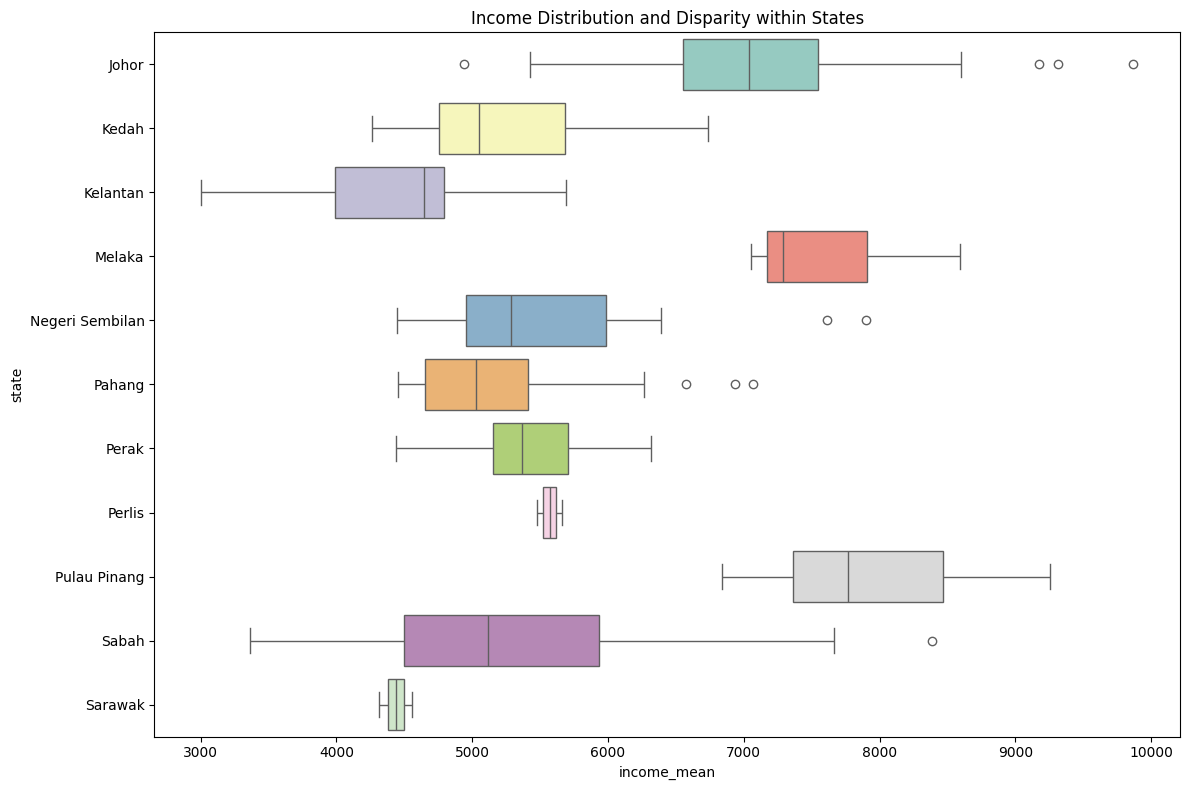

In [6]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='income_mean', y='state', palette='Set3')
plt.title('Income Distribution and Disparity within States')
plt.tight_layout()
plt.show()

Preparation for Decision-Making

5. Identifying Districts with Highest Inequality (Income Gap)

In [7]:
df['income_gap'] = df['income_mean'] - df['income_median']
high_inequality_districts = df.sort_values(by='income_gap', ascending=False).head(5)

print("Districts with highest income inequality:")
print(high_inequality_districts[['state', 'district', 'income_gap']])

Districts with highest income inequality:
               state       district  income_gap
157            Sabah  Kota Kinabalu        2431
182            Sabah       Semporna        2391
71            Melaka  Melaka Tengah        2036
144     Pulau Pinang     Timur Laut        2013
82   Negeri Sembilan       Seremban        2012
